In [54]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [55]:
# New Antecedent/Consequent objects hold universe variables and membership functions
# Create the three fuzzy variables - two inputs, two outputs
ph_membership = ctrl.Antecedent(np.arange(0, 14, 0.001), 'ph')
water_level_membership = ctrl.Antecedent(np.arange(0, 630, 1), 'water_level') # unit --> -
ph_pump_membership = ctrl.Consequent(np.arange(0,8,0.1),"ph_pump") # duration unit --> seconds
alkaline_pump_membership = ctrl.Consequent(np.arange(0,8,0.1),"alkaline_pump") # duration unit --> seconds

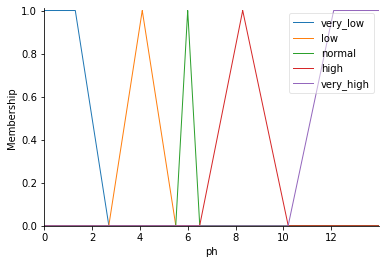

In [56]:
# Generate fuzzy membership functions for first input PH

ph_membership['very_low'] = fuzz.trapmf(ph_membership.universe,[0,0,1.3,2.7])
ph_membership['low'] = fuzz.trimf(ph_membership.universe,[ 2.7 , 4.1 , 5.5 ])
ph_membership['normal'] = fuzz.trimf(ph_membership.universe,[5.5 , 6 , 6.5])
ph_membership['high'] = fuzz.trimf(ph_membership.universe,[ 6.5 , 8.3 , 10.2 ])
ph_membership['very_high'] = fuzz.trapmf(ph_membership.universe,[ 10.2 , 12.1 , 14 , 14 ])
ph_membership.view()

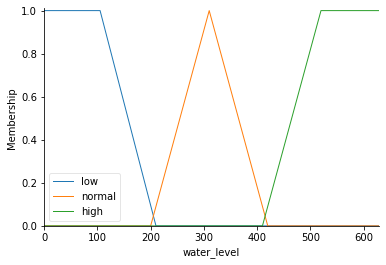

In [57]:
# Generate fuzzy membership functions for second intput water level

water_level_membership['low']   = fuzz.trapmf(water_level_membership.universe,[0,0,105,210]) 
water_level_membership['normal'] = fuzz.trimf(water_level_membership.universe,[200,310,420]) 
water_level_membership['high']    = fuzz.trapmf(water_level_membership.universe,[410,520,630,630]) 
water_level_membership.view()

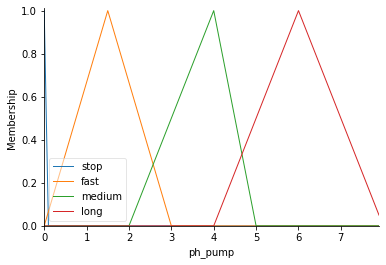

In [58]:
# Generate fuzzy membership functions for output PH Pump Duration

ph_pump_membership["stop"] = fuzz.trimf(ph_pump_membership.universe,[ 0,0,0])
ph_pump_membership["fast"] = fuzz.trimf(ph_pump_membership.universe,[0,1.5,3])
ph_pump_membership["medium"] = fuzz.trimf(ph_pump_membership.universe,[2,4,5])
ph_pump_membership["long"] = fuzz.trimf(ph_pump_membership.universe,[ 4,6,8])

ph_pump_membership.view()

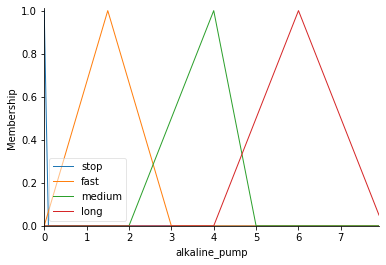

In [59]:
# # Generate fuzzy membership functions for output Alkaline Pump Duration

alkaline_pump_membership["stop"] = fuzz.trimf(alkaline_pump_membership.universe,[ 0,0,0])
alkaline_pump_membership["fast"] = fuzz.trimf(alkaline_pump_membership.universe,[0,1.5,3])
alkaline_pump_membership["medium"] = fuzz.trimf(alkaline_pump_membership.universe,[2,4,5])
alkaline_pump_membership["long"] = fuzz.trimf(alkaline_pump_membership.universe,[ 4,6,8])
alkaline_pump_membership.view()

In [60]:
#Define Rules
rules = []


rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['very_low'] & water_level_membership['low']),
        consequent= (alkaline_pump_membership['medium'] , ph_pump_membership['stop'])
    )
)
rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['very_low'] & water_level_membership['normal']),
        consequent= (alkaline_pump_membership['medium'] , ph_pump_membership['stop'])
    )
)
rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['very_low'] & water_level_membership['high']),
        consequent= (alkaline_pump_membership['long'] , ph_pump_membership['stop'])
    )
)


rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['low'] & water_level_membership['low']),
        consequent= (alkaline_pump_membership['fast'] , ph_pump_membership['stop'])
    )
)
rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['low'] & water_level_membership['normal']),
        consequent= (alkaline_pump_membership['medium'] , ph_pump_membership['stop'])
    )
)
rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['low'] & water_level_membership['high']),
        consequent= (alkaline_pump_membership['medium'] , ph_pump_membership['stop'])
    )
)




rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['normal']),
        consequent= (ph_pump_membership['stop'] , alkaline_pump_membership['stop'])
    )
)






rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['high'] & water_level_membership['low']),
        consequent= (alkaline_pump_membership['stop'] , ph_pump_membership['fast'])
    )
)
rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['high'] & water_level_membership['normal']),
        consequent= (alkaline_pump_membership['stop'] , ph_pump_membership['medium'])
    )
)
rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['high'] & water_level_membership['high']),
        consequent= (alkaline_pump_membership['stop'] , ph_pump_membership['medium'])
    )
)


rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['very_high'] & water_level_membership['low']),
        consequent= (alkaline_pump_membership['stop'] , ph_pump_membership['medium'])
    )
)
rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['very_high'] & water_level_membership['normal']),
        consequent= (alkaline_pump_membership['stop'] , ph_pump_membership['medium'])
    )
)
rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['very_high'] & water_level_membership['high']),
        consequent= (alkaline_pump_membership['stop'] , ph_pump_membership['long'])
    )
)


In [61]:
# create a control system via:
pump_ctrl = ctrl.ControlSystem(rules)

In [62]:
#In order to simulate this control system, we will create a ControlSystemSimulation. 
pump_sim = ctrl.ControlSystemSimulation(pump_ctrl)

In [63]:
pump_sim.input['ph'] = 5.1

pump_sim.input['water_level'] = 400
pump_sim.compute()
print(" "*10 + f"output PH--> {round(pump_sim.output['ph_pump'],1)}")
print(" "*10 + f"output Alkaline--> {round(pump_sim.output['alkaline_pump'],1)}")


          output PH--> 0.0
          output Alkaline--> 3.5


In [64]:
pump_sim.output

OrderedDict([('alkaline_pump', 3.543939393939393),
             ('ph_pump', 0.04560606060606061)])

In [65]:
round(pump_sim.output["ph_pump"],1)

0.0

In [66]:
round(pump_sim.output["alkaline_pump"],1)

3.5

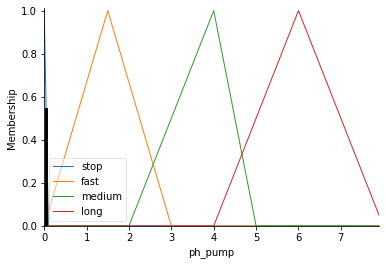

In [67]:
ph_pump_membership.view(sim=pump_sim)

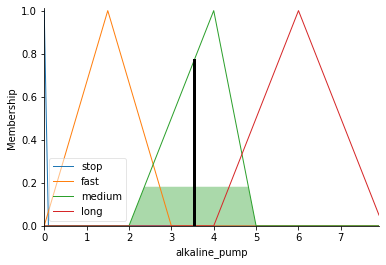

In [68]:
alkaline_pump_membership.view(sim=pump_sim)

In [69]:
    #Ref: 
#https://www.researchgate.net/profile/Nico-Surantha/publication/335861668_Intelligent_Monitoring_and_Controlling_System_for_Hydroponics_Precision_Agriculture/links/5e8c079f92851c2f52868179/Intelligent-Monitoring-and-Controlling-System-for-Hydroponics-Precision-Agriculture.pdf